In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Lab 10: Logistic Regression

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your solution.

## Due Date

This assignment is due on Thursday, July 23rd, at 11:59PM.

In this lab you will practice logistic regression.

# Collaborators  

Write names in this cell:

In [2]:
# Run this cell to set up your notebook
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import cufflinks as cf


%matplotlib inline
sns.set()
sns.set_context("talk")
py.init_notebook_mode(connected=False)
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')

In this lab we will be working on the breast cancer dataset. This dataset can be easily loaded using the `sklearn.datasets.load_breast_cancer()` method.  
The data format is not a `pandas.DataFrame` so we will create a new DataFrame from it.

In [3]:
data = sklearn.datasets.load_breast_cancer()
# data is actually a dictionnary
print(data.keys())
print(data.DESCR)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for ea

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

Let us try to fit a simple model with only one feature.

In [5]:
# Define our features/target
X = df[["mean radius"]]
# Target data['target'] = 0 is malignant 1 is benign
Y = (data.target == 0)

In [6]:
# Split between train and test
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

print(f"Training Data Size: {len(x_train)}")
print(f"Test Data Size: {len(x_test)}")

Training Data Size: 426
Test Data Size: 143


### Question 1

Let's first fit a logistic regression model using the training set. 

For this problem, we will go one level of abstraction higher and simply use the existing LogisticRegression implementation in sklearn.

Fill in the code below so that you to compute the training and testing accuracy, defined as:

$$
\large
\text{Training Accuracy} = \frac{1}{n_{train\_set}} \sum_{i \in \text{train_set}} {\mathbb{1}_{y_i == \hat{y_i}}}
$$

$$
\large
\text{Testing Accuracy} = \frac{1}{n_{test\_set}} \sum_{i \in \text{test_set}} {\mathbb{1}_{y_i == \hat{y_i}}}
$$

where $\hat y_i $ is the prediction of our model, $ y_i $ the true value, and $\mathbb{1}_{y_i == \hat{y_i}}$ an indicator function. This means that $\mathbb{1}_{y_i == \hat{y_i}} = 1 $ if $ y_i = \hat{y_i}$, and $ \mathbb{1}_{y_i == \hat{y_i}} = 0 $ if $ y_i \neq \hat{y_i}$.

<!--
BEGIN QUESTION
name: q1
-->

In [7]:
lr = sklearn.linear_model.LogisticRegression(fit_intercept=True, solver = 'lbfgs')

lr.fit(x_train,y_train) 
train_accuracy = sum(y_train == lr.predict(x_train)) / len(y_train)
test_accuracy = sum(y_test == lr.predict(x_test)) / len(y_test)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Train accuracy: 0.8709
Test accuracy: 0.9091


In [8]:
grader.check("q1")

All tests passed!

### Question 2
It seems we can get a very high test accuracy. How about precision and recall?  
- Precision (also called positive predictive value) is the fraction of true positives among the total number of data points predicted as positive.  
- Recall (also known as sensitivity) is the fraction of true positives among the total number of data points with positive labels.

Precision is the ability of the classifier not to label as positive a sample that is negative, while recall is the ability of the classifier to find all the positive samples.

To understand the link between recall/precision on the one hand and sensitivity/specificity on the other hand, it's useful to come back to a confusion matrix:

Confusion matrix, without normalization
[[85  4]
 [ 9 45]]
Normalized confusion matrix
[[0.95505618 0.04494382]
 [0.16666667 0.83333333]]


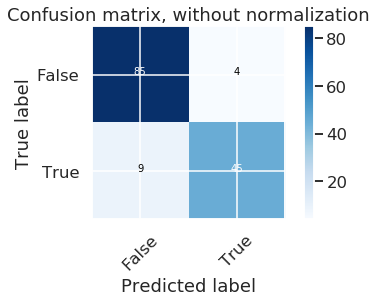

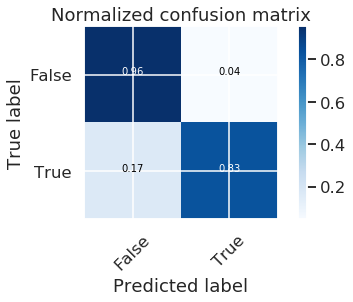

In [9]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, lr.predict(x_test))

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['False', 'True']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

Then:
$$
\text{Precision} = \frac{n_{true\_positives}}{n_{true\_positives} + n_{false\_positives}}
$$

$$
\text{Recall} = \frac{n_{true\_positives}}{n_{true\_positives} + n_{false\_negatives}}
$$

As illustrated in the figure below:
![precision_recall](precision_recall.png)

Now let's compute the precision and recall for the test set using the model we got from Question 1.  
Please do not use `sklearn.metrics` for this computation.

<!--
BEGIN QUESTION
name: q2
-->

In [10]:
y_pred = lr.predict(x_test) 

tp= np.sum((y_pred ==y_test)&(y_test ==1))
fp = np.sum((y_pred !=y_test) &(y_pred ==1))
tn = np.sum((y_pred ==y_test)&(y_test ==0))
fn = np.sum((y_pred !=y_test) &(y_pred ==0))
precision = tp/(tp + fp)
recall = tp/(tp + fn)

print(f'precision = {precision:.4f}')
print(f'recall = {recall:.4f}')

precision = 0.9184
recall = 0.8333


In [11]:
grader.check("q2")

All tests passed!

Our precision is fairly high while our recall is a bit lower. Why might we observe these results? Please consider the following plots, which display the distribution of the target variable in the training and testing sets. 

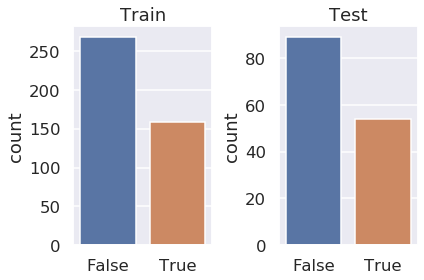

In [12]:
fig, axes = plt.subplots(1, 2)
sns.countplot(y_train, ax=axes[0]);
sns.countplot(y_test, ax=axes[1]);

axes[0].set_title('Train')
axes[1].set_title('Test')
plt.tight_layout();

Over 250 false positives and over 150 true positives in the training set. Over 80 false positives and about 50 true positives in the test set. High precision low recall. High precision -> Most items selected (positives) are relevant (actually positive). Low recall -> most positive items aren't selected.

###  Question 3
Now let's try to analyze the cross entropy loss from logistic regression. The average loss across our entire dataset is:

$$\Large R(\theta) = -\frac{1}{n} \sum_{i=1}^n \left( y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i})  \right) $$

where $\hat{y_i} = \sigma(X_i^T \theta)$. Here, $X_i$ is a single row of our design matrix.

In [13]:
theta = np.array([lr.coef_[0][0],
                  lr.intercept_[0]])
X_new = np.hstack([X,
                 np.ones([len(X), 1])]) # This is adding a coefficient of 1 for the intercept term
print(theta)
print()
print(X_new)

[  0.92881284 -13.75289919]

[[17.99  1.  ]
 [20.57  1.  ]
 [19.69  1.  ]
 ...
 [16.6   1.  ]
 [20.6   1.  ]
 [ 7.76  1.  ]]


In [14]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def lr_loss(theta, X, Y):
    '''
    Compute the cross entropy loss using X, Y, and theta. 
    Hint: The notation B @ v means: compute the matrix multiplication Bv.

    Args:
        theta: The model parameters. 
        X: The design matrix
        Y: The label 

    Return:
        The cross entropy loss.
    '''
    y_hat = sigmoid(X.dot(theta))
    return -np.mean((Y*np.log(y_hat)) + ((1-Y) * np.log(1-y_hat)))

In [15]:
grader.check("q3")

All tests passed!

In [16]:
uvalues = np.linspace(-8,8,70)
vvalues = np.linspace(-5,5,70)
(u,v) = np.meshgrid(uvalues, vvalues)
thetas = np.vstack((u.flatten(),v.flatten()))
lr_loss_values = np.array([lr_loss(t, X_new, Y) for t in thetas.T])
lr_loss_surface = go.Surface(name="Logistic Regression Loss",
        x=u, y=v, z=np.reshape(lr_loss_values,(len(uvalues), len(vvalues))),
        contours=dict(z=dict(show=True, color="gray", project=dict(z=True)))
    )

py.iplot(go.Figure(data=[lr_loss_surface]))

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning:

divide by zero encountered in log

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning:

invalid value encountered in multiply



What remarks can you make on this plot?

Minimum loss is  a line so theta have multiple values.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [17]:
grader.check_all()

q1:

    All tests passed!
    

q2:

    All tests passed!
    

q3:

    All tests passed!

## Submission

Make sure you have run all cells in your notebook in order before     running the cell below, so that all images/graphs appear in the output. The cell below will generate     a zipfile for you to submit. **Please save before exporting!**

In [18]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)